A survey was conducted to gauge an audience interest in different data science topics, namely:

    1. Big Data (Spark / Hadoop)
    2. Data Analysis / Statistics
    3. Data Journalism
    4. Data Visualization
    5. Deep Learning
    6. Machine Learning

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data.

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas read_csv method to read the csv file into a pandas dataframe, that looks like the following:

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1

In [3]:
import urllib.request
url = "https://cocl.us/datascience_survey_data"
filename = 'survey_DS.csv'
urllib.request.urlretrieve(url, filename)

('survey_DS.csv', <http.client.HTTPMessage at 0x233fdde4310>)

In [11]:
survey = pd.read_csv('survey_DS.csv', index_col=0)
survey

Very interested  Somewhat interested  \
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   
Machine Learning                       1629                  477   

                            Not interested  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136  
Machine Learning                        74

## Question 2

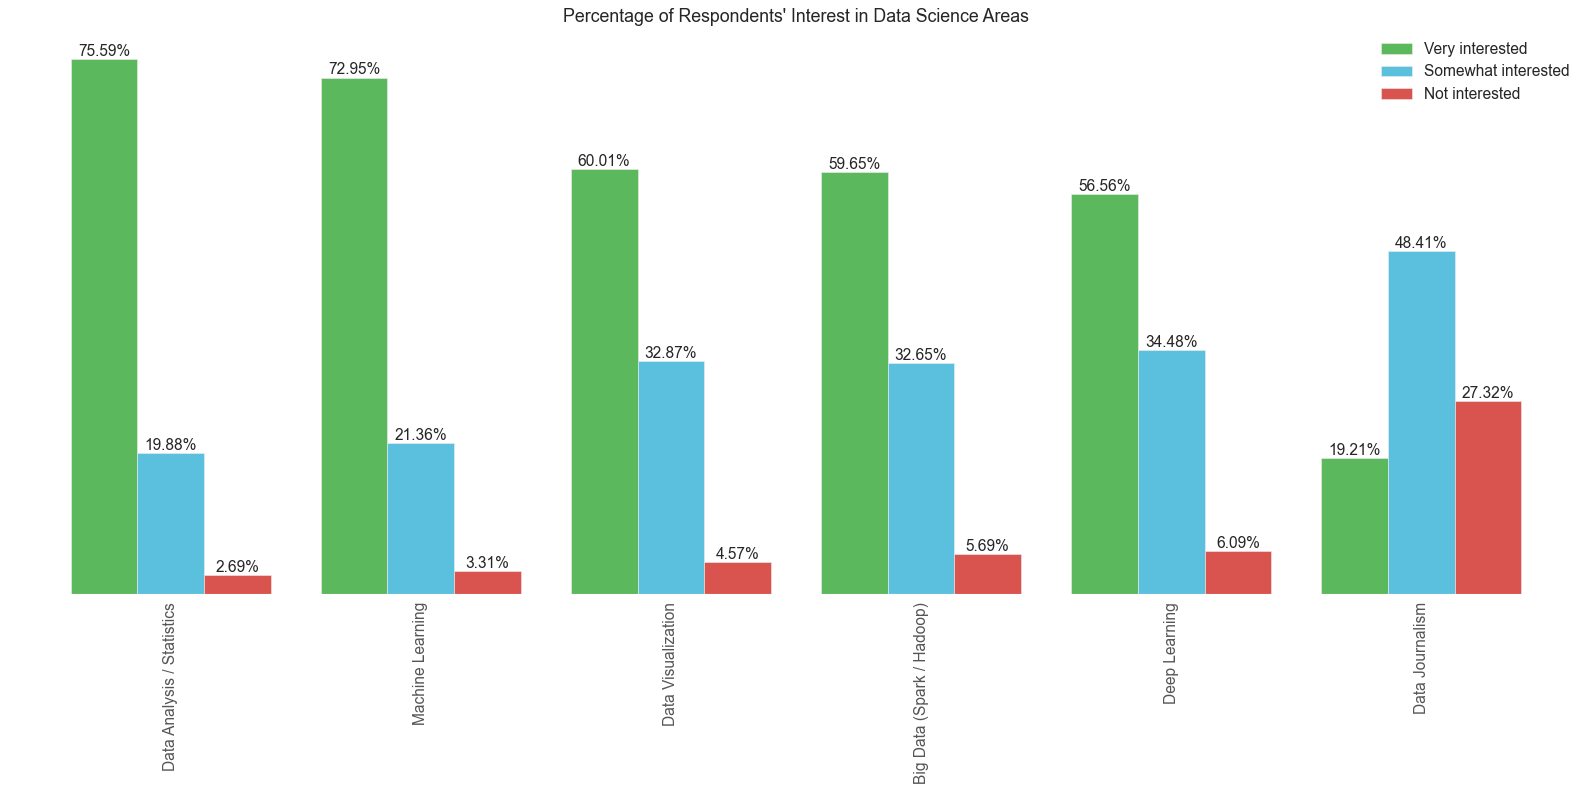

In [114]:
survey.sort_values(by = 'Very interested', ascending=False, inplace=True)

tot_res = 2233
survey_prop = round(survey*100/tot_res, 2)

plt.style.use('ggplot')
colbar = ['#5cb85c', '#5bc0de', '#d9534f']

survey_prop.plot.bar(figsize = (20,10),
                    width = 0.8,
                    color = colbar,
                    fontsize = 14)

ax = plt.gca()
leg = ax.legend(prop={"size":14})
plt.title("Percentage of Respondents' Interest in Data Science Areas", fontdict ={"fontsize":16})
plt.yticks([])
ax.set_facecolor("white")

for i, topic in enumerate(survey_prop.values):
    for j, interest in enumerate(topic):
        ax.annotate(text = str(interest) + '%',
                    xy=(i + j*0.8/3 - 0.8/3, interest + 0.01),
                    ha='center', va='bottom',
                    fontsize = 14)


plt.tight_layout()

plt.show()

## Question 3

In the final lab, we created a map with markers to explore crime rate in San Francisco, California. In this question, you are required to create a Choropleth map to visualize crime in San Francisco.

Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

    1. Central,
    2. Southern,
    3. Bayview,
    4. Mission,
    5. Park,
    6. Richmond,
    7. Ingleside,
    8. Taraval,
    9. Northern, and,
    10 Tenderloin.

Convert the San Francisco dataset, which you can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

In [115]:
url = "https://cocl.us/sanfran_crime_dataset"
filename = 'crime.csv'
urllib.request.urlretrieve(url, filename)

('crime.csv', <http.client.HTTPMessage at 0x233830da940>)

In [118]:
crime = pd.read_csv('crime.csv')
crime.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [186]:
crime_geo = crime['PdDistrict'].value_counts().to_frame()
crime_geo['Neighborhood'] = crime_geo.index
crime_geo.rename(columns={'PdDistrict':'Count'}, inplace=True)

crime_geo = crime_geo[['Neighborhood', 'Count']]
crime_geo.set_index(np.linspace(0,9,10).astype(int), inplace=True)

crime_geo

Neighborhood  Count
0     SOUTHERN  28445
1     NORTHERN  20100
2      MISSION  19503
3      CENTRAL  17666
4      BAYVIEW  14303
5    INGLESIDE  11594
6      TARAVAL  11325
7   TENDERLOIN   9942
8     RICHMOND   8922
9         PARK   8699

## Question 4

As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: https://cocl.us/sanfran_geojson.

In [188]:
url = "https://cocl.us/sanfran_geojson"
filename = 'sanfran.json'
urllib.request.urlretrieve(url, filename)

('sanfran.json', <http.client.HTTPMessage at 0x233914d5790>)

In [212]:
import folium

In [218]:
sanfran_geo = r'sanfran.json' # geojson file

latitude = 37.77
longitude = -122.42
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [219]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
folium.Choropleth(
    geo_data=sanfran_geo,
    data=crime_geo,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in San Francisco'
).add_to(sanfran_map)

# display map
sanfran_map